# Assignment 7

## Group members

- Erdem Halil - gushaliler@student.gu.se

#### 1. Analyse how many questions are correctly answered by each student. Show the result with appropriate visualisation.


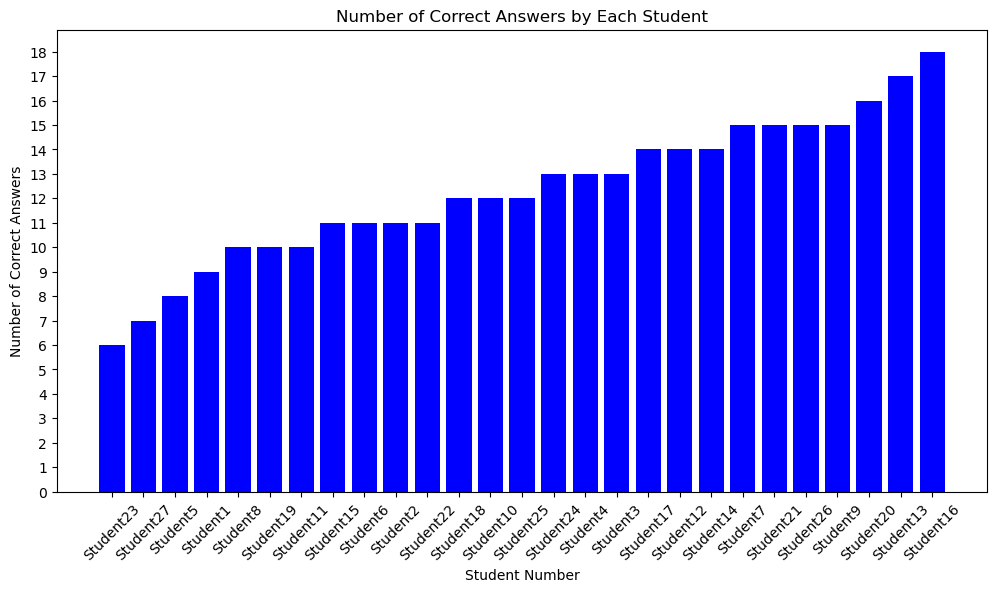

In [82]:
import pandas as pd 
import matplotlib.pyplot as plt

poll_report = pd.read_csv("Poll_Report.csv", delimiter=";")
poll_info = pd.read_csv("Poll_Info.csv", delimiter="\t")

merged_df = poll_report.merge(poll_info, left_on="Question ID", right_on="Question")
merged_df["Is Correct"] = merged_df["Student Answer"] == merged_df["Correct Answer"]

grouped_data = merged_df.groupby("User Name")["Is Correct"].sum().reset_index().sort_values(by="Is Correct")
plt.figure(figsize=(12, 6))
plt.bar(
    grouped_data["User Name"],
    grouped_data["Is Correct"], 
    color="blue"
)
plt.xlabel("Student Number")
plt.ylabel("Number of Correct Answers")
plt.title("Number of Correct Answers by Each Student")
plt.xticks(rotation=45)
plt.yticks(range(int(grouped_data["Is Correct"].max()) + 1))
plt.show()

####  2. Analyse how many students answered correctly for each question. Show the result with appropriate visualisation

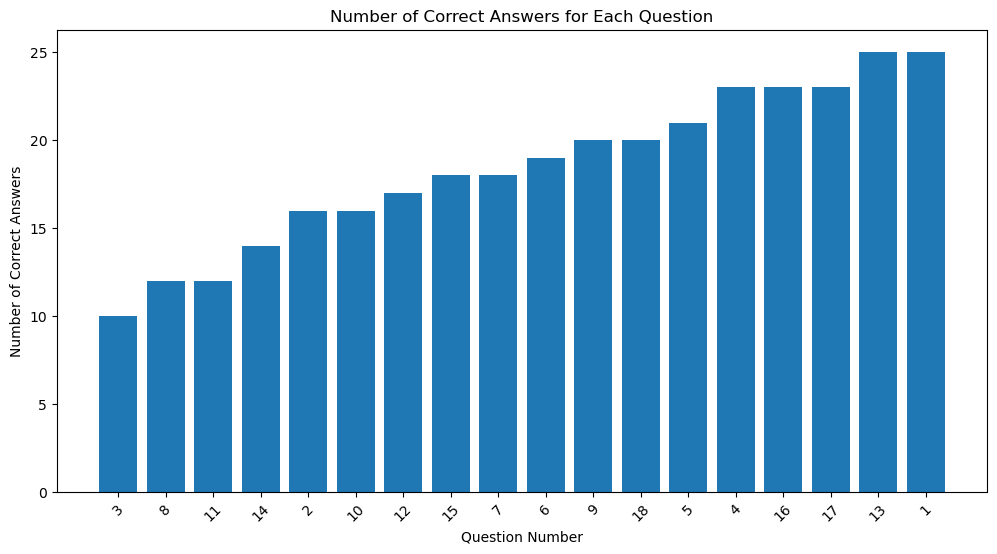

In [83]:
group_by_question = merged_df.groupby("Question ID")["Is Correct"].sum().reset_index().sort_values(by="Is Correct")
plt.figure(figsize=(12, 6))
plt.bar(
    group_by_question["Question ID"].astype(str),
    group_by_question["Is Correct"]
)
plt.xlabel("Question Number")
plt.ylabel("Number of Correct Answers")
plt.title("Number of Correct Answers for Each Question")
plt.xticks(rotation=45)
plt.show()

####  3A. For each student, which question(s) took the longest time for that student?

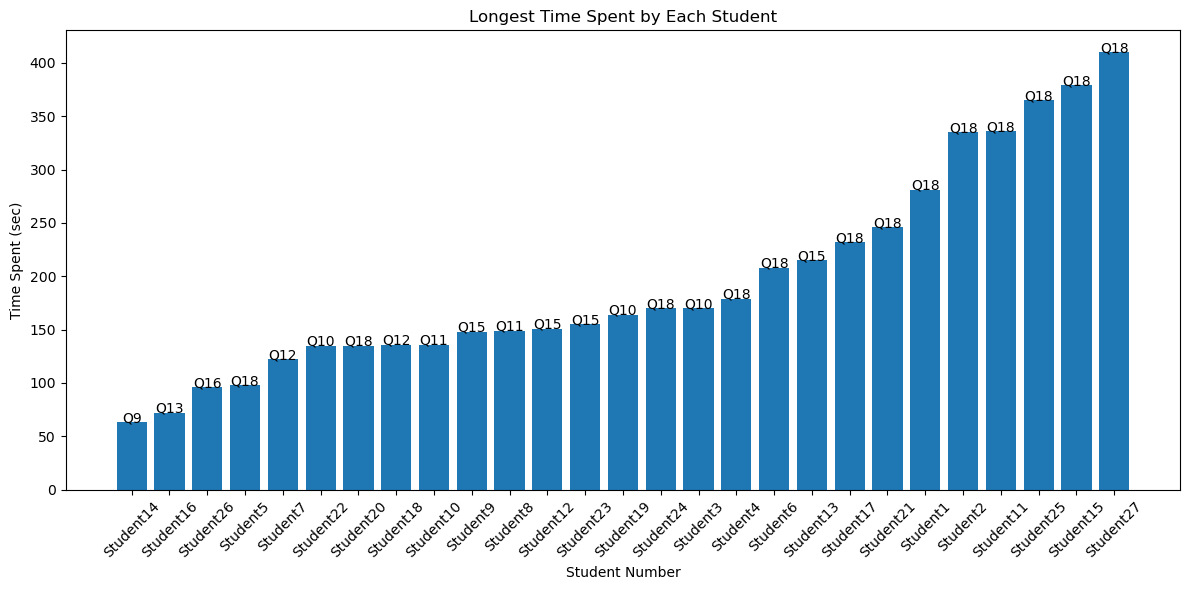

In [84]:
merged_df["Time Launched"] = pd.to_datetime(merged_df["Time Launched"])
merged_df["Submitted Date/Time"] = pd.to_datetime(merged_df["Submitted Date/Time"])

merged_df["Time Spent"] = (merged_df["Submitted Date/Time"] - merged_df["Time Launched"]).dt.seconds

longest = merged_df.loc[merged_df.groupby("User Name")["Time Spent"].idxmax()].sort_values(by="Time Spent")

plt.figure(figsize=(12, 6))
bars = plt.bar(longest.set_index("User Name")["Time Spent"].index, longest.set_index("User Name")["Time Spent"])
plt.ylabel("Time Spent (sec)")
plt.xlabel("Student Number")
plt.title("Longest Time Spent by Each Student")

for bar, q in zip(bars, longest["Question"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"Q{q}", ha="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



#### 3B. Which question(s) took the longest time to answer among all students (that is, no student took longer to give a correct answer to this question or to any other question)?


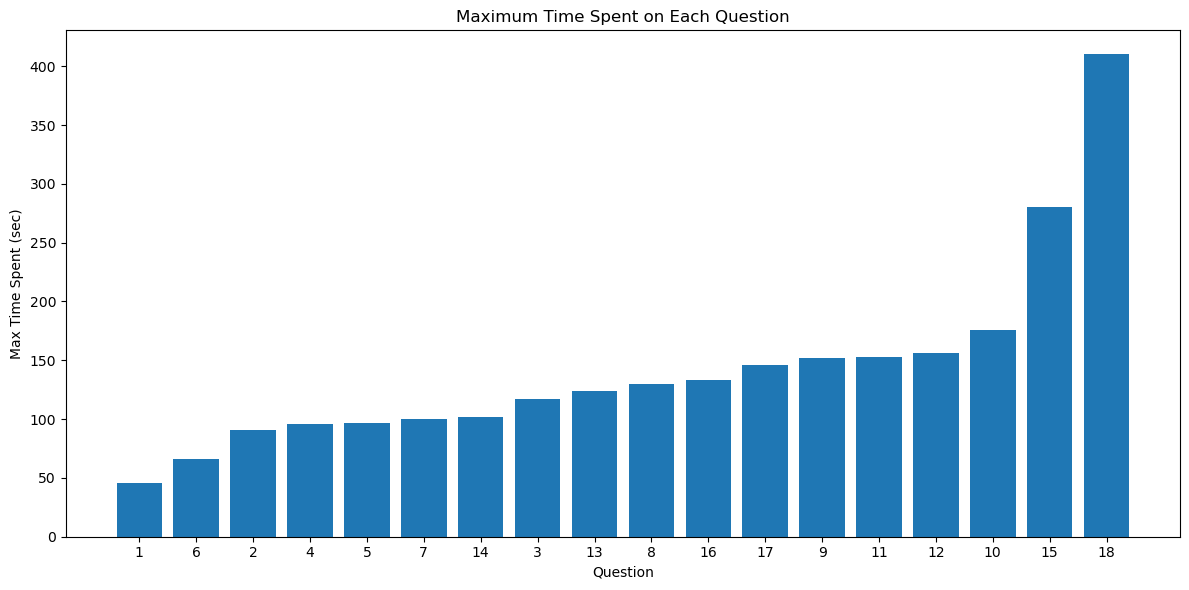

In [85]:
max_time = merged_df.groupby("Question")["Time Spent"].max().sort_values()

plt.figure(figsize=(12, 6))
plt.bar(range(1, len(max_time) + 1), max_time)
plt.ylabel("Max Time Spent (sec)")
plt.xlabel("Question")
plt.title("Maximum Time Spent on Each Question")
plt.xticks(range(1, len(max_time) + 1), max_time.index, rotation=0)
plt.tight_layout()
plt.show()

#### 3C. Which question(s) had the longest average response time?

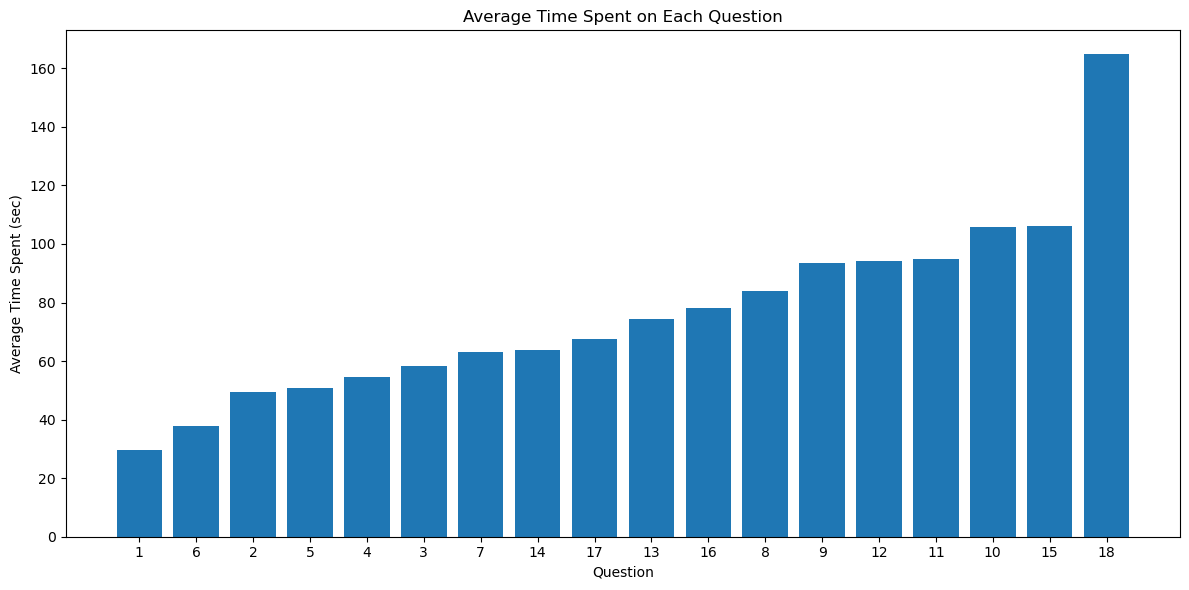

In [86]:
average_time = merged_df.groupby("Question")["Time Spent"].mean().sort_values()

plt.figure(figsize=(12, 6))
plt.bar(range(1, len(average_time) + 1), average_time)
plt.ylabel("Average Time Spent (sec)")
plt.xlabel("Question")
plt.title("Average Time Spent on Each Question")
plt.xticks(range(1, len(average_time) + 1), average_time.index, rotation=0)
plt.tight_layout()
plt.show()

#### 4. Investigate whether students who took a longer time to answer perform well or not.

The correlation between the number of correct answers and total time spent is -0.5425299181264831


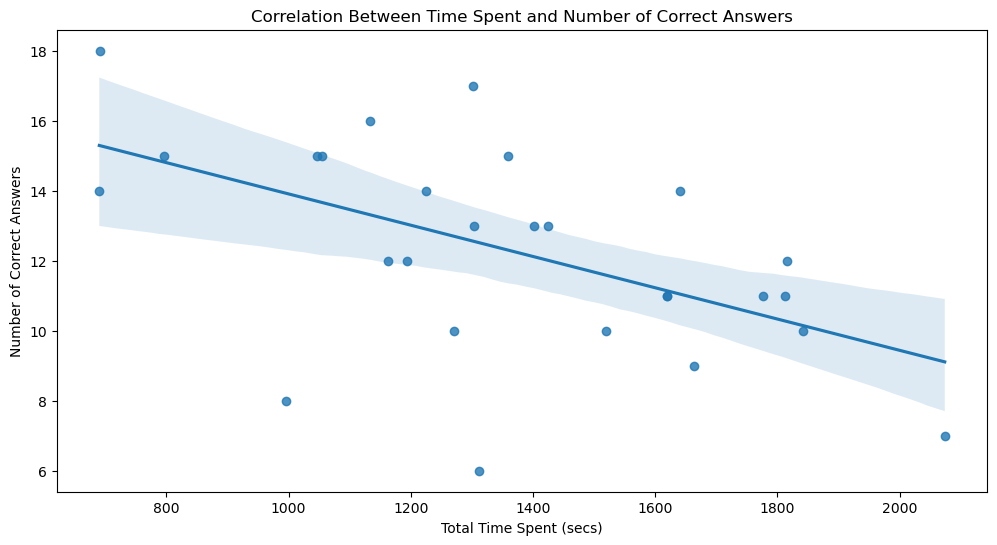

In [87]:
import seaborn as sns

total = merged_df.groupby("User Name")["Time Spent"].sum().sort_values().reset_index()
merged_total = pd.merge(grouped_data, total, on="User Name")

correlation = merged_total["Is Correct"].corr(merged_total["Time Spent"])

print(f"The correlation between the number of correct answers and total time spent is {correlation}")

plt.figure(figsize=(12, 6))
sns.regplot(x="Time Spent", y="Is Correct", data=merged_total)
plt.ylabel("Number of Correct Answers")
plt.xlabel("Total Time Spent (secs)")
plt.title("Correlation Between Time Spent and Number of Correct Answers")
plt.show()

#### 5. Find all pairs of students who gave the same wrong answers for at least two questions

In [88]:
wrong_answers = merged_df[merged_df["Is Correct"] == False].groupby("User Name")["Question"].apply(list).reset_index()

pairs = set()
for i, row in wrong_answers.iterrows():
    for j in range(i+1, len(wrong_answers)):
        second_row = wrong_answers.iloc[j]
        if len(set(row["Question"]).intersection(second_row["Question"])) >= 2:
            pairs.add(tuple(sorted([row["User Name"], second_row["User Name"]])))

print(f"{len(pairs)} pairs gave the same wrong answers for at least two questions")

209 pairs gave the same wrong answers for at least two questions


#### 6. Are there more interesting information one can derive from studying how long each student response to each question that might be of interest to the teacher? Convey your thoughts by doing analysis and showing the results.

##### Correlation between wrong answers and time spent on the exam

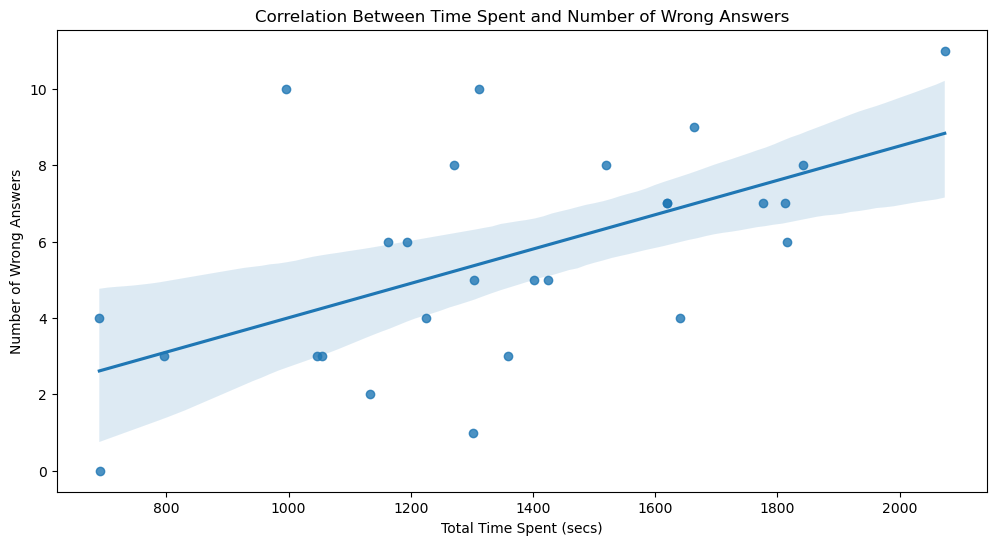

In [89]:
merged_df["Is Wrong"] = ~merged_df["Is Correct"]
wrong = merged_df.groupby("User Name")["Is Wrong"].sum().reset_index()
merged_wrong = pd.merge(wrong, total, on="User Name")
correlation_wrong = merged_wrong["Is Wrong"].corr(merged_wrong["Is Wrong"])

plt.figure(figsize=(12, 6))
sns.regplot(x="Time Spent", y="Is Wrong", data=merged_wrong)
plt.ylabel("Number of Wrong Answers")
plt.xlabel("Total Time Spent (secs)")
plt.title("Correlation Between Time Spent and Number of Wrong Answers")
plt.show()